## Разведочный анализ

Подключитесь к базе данных PostgreSQL и выгрузите таблицу `exploratory`, сохранив ее в датафрейм. <br> <br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `db_ds_students`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`.

In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Параметры подключения
host = "dsstudents.skillbox.ru"
port = 5433
database = "db_ds_students"
user = "readonly"
password = "6hajV34RTQfmxhS"

# Устанавливаем соединение с базой данных
conn = psycopg2.connect(host=host, port=port, database=database, user=user, password=password)

# Выполняем SQL-запрос для выгрузки данных
query = "SELECT * FROM exploratory"
df = pd.read_sql_query(query, conn)

# Закрываем соединение
conn.close()

D:\Anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
df = df.apply(pd.to_numeric)

Постройте гистограммы распределения для каждой переменной. Поэксперементируйте с количеством "разбивок" (bins). Опишите распределение каждой переменной. В каких областях (пример: от нуля до 2 расположено примерно треть всех значений) сосредоточено больше значений, в каких меньше.

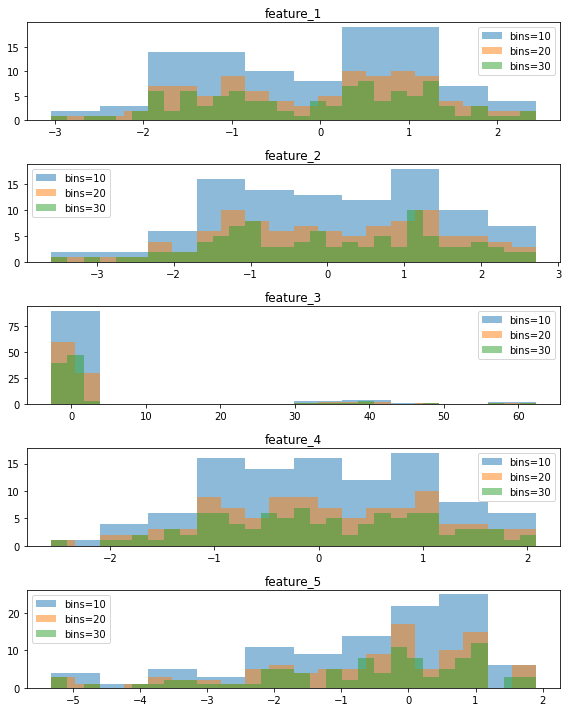

In [4]:
# Создайте сетку для гистограмм
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 10))

# Список колонок
columns = df.columns

# Экспериментируйте с количеством "разбивок" (bins)
bins_list = [10, 20, 30]

for i in range(5):
    ax = axes[i]
    ax.set_title(columns[i])
    
    for bins in bins_list:
        ax.hist(df[columns[i]], bins=bins, alpha=0.5, label=f'bins={bins}')

    ax.legend()

# Показать гистограммы
plt.tight_layout()
plt.show()

Этот код создает 5 гистограмм для каждой из пяти переменных (feature_1, feature_2, feature_3, feature_4, feature_5) и позволяет экспериментировать с разным количеством "разбивок" (bins). Гистограммы показывают распределение значений в каждой переменной, и вы можете видеть, в каких областях сосредоточено больше или меньше значений.

Постройте ящик с усами для каждой переменной. Опишите распределение данных. Прокомментируйте наличие или отсутствие выбросов.

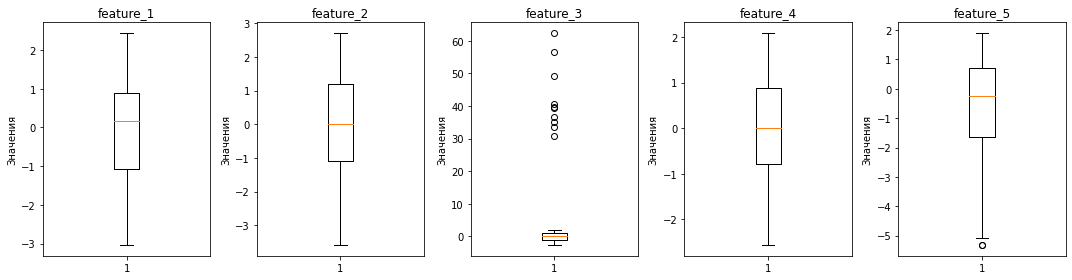

In [5]:
# Создайте сетку для ящиков с усами
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 4))

# Список колонок
columns = df.columns

for i in range(5):
    ax = axes[i]
    ax.set_title(columns[i])
    ax.boxplot(df[columns[i]])
    ax.set_ylabel("Значения")

# Показать ящики с усами
plt.tight_layout()
plt.show()

1. Медиана (линия внутри ящика): Медиана представляет собой центральное значение данных.
2. Квартили (верхний и нижний концы ящика): Ящик охватывает межквартильный диапазон (IQR), который показывает разницу между 75-м и 25-м процентилями данных.
3. Усы (усики сверху и снизу): Усы простираются до определенного расстояния от верхнего и нижнего концов ящика. Любые точки данных, выходящие за пределы усов, могут считаться выбросами.
4. Выбросы (точки за пределами усов): Выбросы представляют собой значения, находящиеся далеко от остальных данных.

Из графика "ящика с усами" для feature_3 видно, что данные этой переменной имеют выбросы в диапазоне от примерно 30 до 60. Это означает, что некоторые значения в переменной feature_3 значительно превышают остальные значения и могут потребовать дополнительного исследования.

Выбросы могут указывать на необычные или аномальные события в данных. В данном случае, значения feature_3 в интервале от 30 до 60 могут быть результатом ошибки в измерениях или каких-то особых условий, которые не типичны для остальных наблюдений. Понимание природы этих выбросов может потребовать дополнительного анализа данных или обратной связи с теми, кто собирал данные, чтобы установить причины таких аномалий.

Допустим, мы хотим построить регрессионную модель по имеющимся данным и исследовать влияние остальных переменных на переменную `feature_4`. Постройте диаграммы рассеяния. Определите по графикам, какие независимые переменные имело бы смысл включить в модель регрессии?

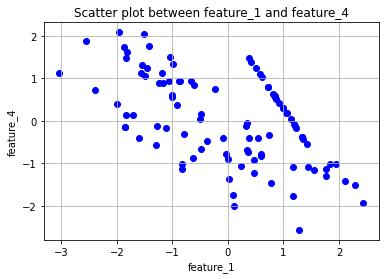

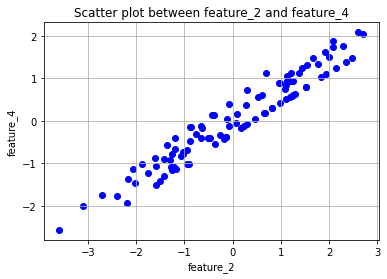

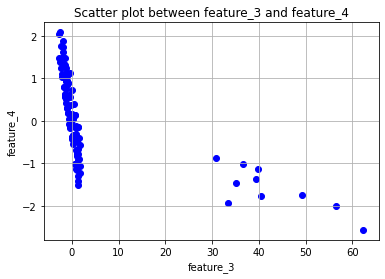

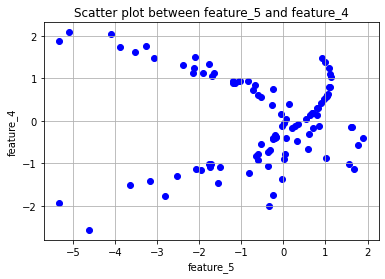

In [6]:
# Создаем диаграммы рассеяния для каждой независимой переменной по отношению к feature_4
for column in df.columns:
    if column != 'feature_4':
        plt.figure(figsize=(6, 4))
        plt.scatter(df[column], df['feature_4'], color='blue')
        plt.title(f'Scatter plot between {column} and feature_4')
        plt.xlabel(column)
        plt.ylabel('feature_4')
        plt.grid(True)
        plt.show()

1. Scatter plot между feature_1 и feature_4: Вы видите линейную зависимость, и она выглядит как диагональ с верхнего левого угла в правый нижний. Это может быть хорошим индикатором для включения feature_1 в модель регрессии.

2. Scatter plot между feature_2 и feature_4: Также наблюдается линейная зависимость, но она направлена в противоположную сторону - диагональ с нижнего левого угла в правый верхний. Это также может быть хорошим кандидатом для включения в модель регрессии.

3. Scatter plot между feature_3 и feature_4: Здесь зависимость более сложная. Наблюдается скопление значений вертикально на x = 0 и несколько точек от x = 30 до x = 60. Вероятно, feature_3 может быть полезным, но нужен дополнительный анализ для понимания, как именно она влияет на feature_4.

4. Scatter plot между feature_5 и feature_4: Вы видите две диагонали - одну с нижнего левого угла в правый верхний и другую с верхнего левого угла в правый нижний. Есть также скопление на x = 0, y = 0. Это также может быть хорошим кандидатом для включения в модель регрессии.

Исходя из ваших наблюдений, feature_1, feature_2 и feature_5 кажутся хорошими кандидатами для включения в модель регрессии для предсказания feature_4. Однако, feature_3 требует дополнительного анализа, чтобы определить его влияние на feature_4.